In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the JSON file
with open('nested_data.json', 'r') as file:
    data = json.load(file)

### Explanation of Loading Nested JSON Data and Initial Setup for Analysis

#### 1. **Loading Nested JSON Data**

- **File Reading**: 
  - Uses `open()` function to open and read the JSON file named `nested_data.json`.
  - Loads the JSON content into Python data structure using `json.load(file)` and assigns it to `data`.

#### 2. **Initial Libraries Import**

- **Pandas (`pd`)**:
  - Data manipulation and analysis library in Python, used for handling structured data.

- **Matplotlib (`plt`)** and **Seaborn (`sns`)**:
  - Matplotlib is a plotting library, and Seaborn is a higher-level interface for statistical visualization.
  - These libraries are imported for visualizing and exploring the data after it's loaded.

#### Next Steps:
- After loading the JSON data into the `data` variable, the next steps typically involve:
  - **Data Exploration**: Inspecting the structure of `data` to understand its schema and nested levels.
  - **Data Transformation**: Converting the nested JSON structure into a tabular format suitable for analysis using Pandas.
  - **Visualization**: Using Matplotlib and Seaborn to create visual representations (plots, charts) to gain insights from the data.
  
These steps will depend on the specific structure and content of `nested_data.json`, which can vary widely in complexity and nesting levels.

In [2]:
def extract_keys(data, parent_key=''):
    keys = set()
    if isinstance(data, dict):
        for key, value in data.items():
            full_key = f"{parent_key}.{key}" if parent_key else key
            keys.add(full_key)
            keys.update(extract_keys(value, full_key))
    elif isinstance(data, list):
        for item in data:
            keys.update(extract_keys(item, parent_key))
    return keys

# Load JSON data from file
# Extract all keys
all_keys = extract_keys(data)

# Print all unique keys
print("\n".join(sorted(all_keys)))


programs
programs.concerts
programs.concerts.Date
programs.concerts.Location
programs.concerts.Time
programs.concerts.Venue
programs.concerts.eventType
programs.id
programs.orchestra
programs.programID
programs.season
programs.works
programs.works.ID
programs.works.composerName
programs.works.conductorName
programs.works.interval
programs.works.movement
programs.works.movement._
programs.works.movement.em
programs.works.soloists
programs.works.soloists.soloistInstrument
programs.works.soloists.soloistName
programs.works.soloists.soloistRoles
programs.works.workTitle
programs.works.workTitle._
programs.works.workTitle.em



### Explanation of `extract_keys` Function

The `extract_keys` function is designed to recursively traverse a nested data structure, such as a JSON object, and extract all unique keys present within dictionaries and lists. Here’s how it operates:

#### Function Purpose:
- **Goal**: Extract all unique keys from a nested data structure.
- **Input**: `data` represents the current portion of the data structure being processed.
- **Output**: Returns a set of unique keys found within `data`.

#### Key Features:

1. **Handling Dictionaries (`isinstance(data, dict)`)**:
   - **Iteration**: Iterates through each key-value pair (`key, value`) in the dictionary using `data.items()`.
   - **Key Formation**: Constructs full keys (`full_key`) by concatenating `parent_key` with the current `key` (`f"{parent_key}.{key}"`).
   - **Recursion**: Recursively calls `extract_keys` on `value` with `full_key` as `parent_key` to handle nested dictionaries.

2. **Handling Lists (`isinstance(data, list)`)**:
   - **Iteration**: Iterates through each `item` in the list.
   - **Recursion**: Recursively calls `extract_keys` on `item` with `parent_key` unchanged to handle elements within the list.

3. **Combining Results**:
   - **Set Usage**: Uses a set (`keys`) to collect unique keys, ensuring each key is added only once regardless of duplicates.

4. **Return Value**:
   - **Result**: Returns the set `keys` containing all unique keys extracted from the nested structure.

#### Benefits:
- **Flexibility**: Handles any depth of nesting within the data structure due to its recursive nature.
- **Clarity**: Provides a clear and structured approach to discovering all possible keys within complex JSON-like data.

#### Example Usage:
- Useful for dynamically exploring and documenting the structure of JSON data, facilitating data analysis, transformation, and integration tasks.

This function is essential for understanding the schema and organization of nested data, aiding in effective data processing and manipulation.

In [3]:
# Initialize lists to hold extracted data
programs_list = []
concerts_list = []
works_list = []
soloists_list = []

# Extract data from JSON
for program in data['programs']:
    program_id = program.get('programID')
    orchestra = program.get('orchestra')
    season = program.get('season')

    # Check if the program_id already exists in programs_list
    if not any(prog['ProgramID'] == program_id for prog in programs_list):
        programs_list.append({
            'ProgramID': program_id,
            'Orchestra': orchestra,
            'Season': season
        })

    for concert in program.get('concerts', []):
        concerts_list.append({
            'ProgramID': program_id,
            'Date': concert.get('Date'),
            'eventType': concert.get('eventType'),
            'Venue': concert.get('Venue'),
            'Location': concert.get('Location'),
            'Time': concert.get('Time')
        })

    for work in program.get('works', []):
        work_id = work.get('ID')
        # Convert 'Movement' to string if it's a dictionary
        movement = work.get('movement')
        if isinstance(movement, dict):
            movement = json.dumps(movement)
        works_list.append({
            'ProgramID': program_id,
            'WorkID': work_id,
            'WorkTitle': work.get('workTitle'),
            'ComposerName': work.get('composerName'),
            'ConductorName': work.get('conductorName'),
            'Movement': movement,
        })
        for soloist in work.get('soloists', []):
            soloists_list.append({
                'WorkID': work_id,
                'SoloistName': soloist.get('soloistName'),
                'SoloistRoles': soloist.get('soloistRoles'),
                'SoloistInstrument': soloist.get('soloistInstrument')
            })

# Create DataFrames
programs_df = pd.DataFrame(programs_list)
concerts_df = pd.DataFrame(concerts_list)
works_df = pd.DataFrame(works_list)
soloists_df = pd.DataFrame(soloists_list)

The provided code segment is structured to extract and organize data from a nested JSON structure into separate lists and subsequently into Pandas DataFrames. Here’s an explanation of each part:

### Data Extraction and Organization

1. **Initialization of Lists**
   - Four lists (`programs_list`, `concerts_list`, `works_list`, `soloists_list`) are initialized to hold extracted data corresponding to different levels of nested structure in the JSON.

2. **Iterating Over JSON Data**
   - The code iterates over each `program` in the `data['programs']` array.

3. **Extracting Program Information**
   - For each `program`, it extracts `programID`, `orchestra`, and `season`.
   - Checks if `programID` already exists in `programs_list` to avoid duplicates before appending to `programs_list`.

4. **Extracting Concert Information**
   - Within each `program`, iterates through `concerts`.
   - Extracts `Date`, `eventType`, `Venue`, `Location`, and `Time` for each concert and appends to `concerts_list`.

5. **Extracting Work Information**
   - Within each `program`, iterates through `works`.
   - Extracts `ID`, `workTitle`, `composerName`, `conductorName`, and `movement`.
   - Converts `movement` to JSON string if it's a dictionary.
   - Appends extracted information to `works_list`.

6. **Extracting Soloist Information**
   - For each `work`, iterates through `soloists`.
   - Extracts `soloistName`, `soloistRoles`, and `soloistInstrument` for each soloist and appends to `soloists_list`.

7. **Creating Pandas DataFrames**
   - Converts each list (`programs_list`, `concerts_list`, `works_list`, `soloists_list`) into a corresponding Pandas DataFrame (`programs_df`, `concerts_df`, `works_df`, `soloists_df`).

### Purpose
- **Data Structuring**: Organizes nested JSON data into tabular format suitable for analysis and visualization using Pandas.
- **Normalization**: Splits nested structures (`concerts`, `works`, `soloists`) into separate tables (`concerts_df`, `works_df`, `soloists_df`) linked by common `ProgramID` or `WorkID`.
- **Analysis**: Facilitates querying, aggregation, and exploration of structured data using Pandas’ powerful data manipulation capabilities.

This structured approach ensures that each component of the nested JSON is extracted and stored efficiently, ready for further analysis or visualization tasks.

In [4]:
works_df

,ProgramID,WorkID,WorkTitle,ComposerName,ConductorName,Movement
0,3853,52446*,"SYMPHONY NO. 5 IN C MINOR, OP.67","Beethoven, Ludwig van","Hill, Ureli Corelli",None
1,3853,8834*4,OBERON,"Weber, Carl Maria Von","Timm, Henry C.","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons..."
2,3853,3642*,"QUINTET, PIANO, D MINOR, OP. 74","Hummel, Johann",None,None
3,3853,0*,None,None,None,None
4,3853,8834*3,OBERON,"Weber, Carl Maria Von","Etienne, Denis G.",Overture
...,...,...,...,...,...,...
82788,14136,12636*,MEMORIES OF MARNYI STONE,"Feng, Shuya","Gersen, Joshua",None
82789,14136,2877*4,"SYMPHONY NO. 9, E MINOR, OP.95 (FROM THE NEW W...","Dvorak, Antonín","Gersen, Joshua",Allegro con fuoco
82790,14147,52332*,QUIET CITY,"Copland, Aaron","Gilbert, Alan",None
82791,14147,12071*,"JUNGLE, THE (SYMPHONY NO. 4)","Marsalis, Wynton","Gilbert, Alan",None


In [5]:
works_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82793 entries, 0 to 82792
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProgramID      82793 non-null  object
 1   WorkID         82793 non-null  object
 2   WorkTitle      71427 non-null  object
 3   ComposerName   71427 non-null  object
 4   ConductorName  66314 non-null  object
 5   Movement       25216 non-null  object
dtypes: object(6)
memory usage: 3.8+ MB


In [6]:
works_df.isna()

,ProgramID,WorkID,WorkTitle,ComposerName,ConductorName,Movement
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,True,True
3,False,False,True,True,True,True
4,False,False,False,False,False,False
...,...,...,...,...,...,...
82788,False,False,False,False,False,True
82789,False,False,False,False,False,False
82790,False,False,False,False,False,True
82791,False,False,False,False,False,True


  ProgramID  WorkID                         WorkTitle  \
0      3853  52446*  SYMPHONY NO. 5 IN C MINOR, OP.67   
1      3853  8834*4                            OBERON   
2      3853   3642*   QUINTET, PIANO, D MINOR, OP. 74   
3      3853      0*                              None   
4      3853  8834*3                            OBERON   

              ComposerName        ConductorName  \
0  Beethoven,  Ludwig  van  Hill, Ureli Corelli   
1  Weber,  Carl  Maria Von       Timm, Henry C.   
2          Hummel,  Johann                 None   
3                     None                 None   
4  Weber,  Carl  Maria Von    Etienne, Denis G.   

                                            Movement  
0                                               None  
1  "Ozean, du Ungeheuer" (Ocean, thou mighty mons...  
2                                               None  
3                                               None  
4                                           Overture  
<class 'pandas.core.

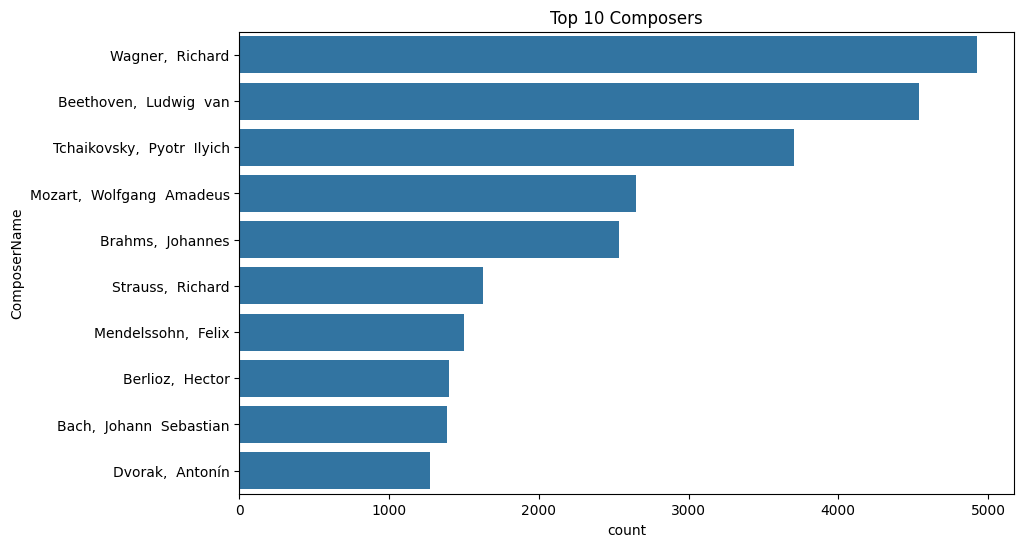

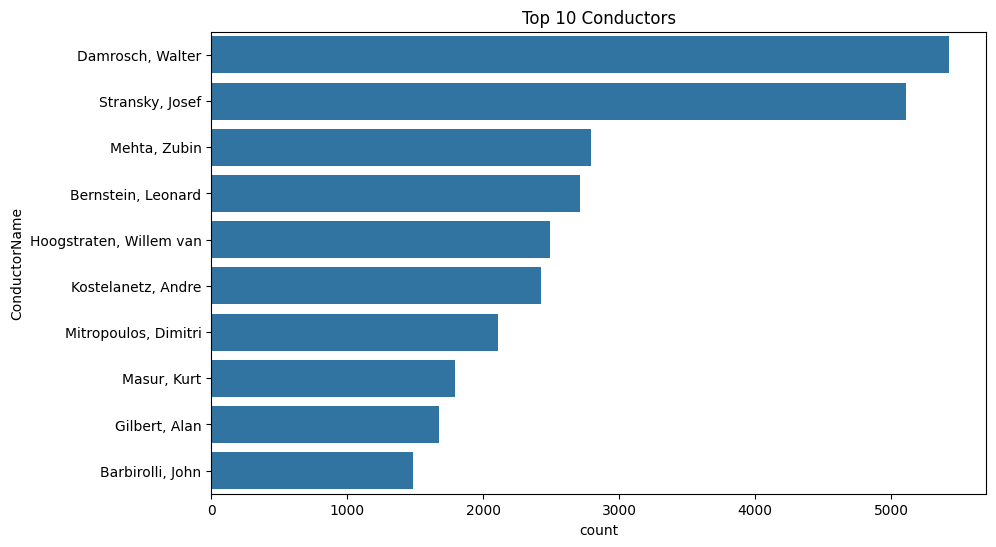

Missing Values:
ProgramID            0
WorkID               0
WorkTitle        11366
ComposerName     11366
ConductorName    16479
Movement         57577
dtype: int64


In [7]:
# Data Structure Overview
print(works_df.head())
print(works_df.info())

# Summary Statistics
print(works_df.describe())

# Distribution of Categorical Variables
plt.figure(figsize=(10, 6))
sns.countplot(y='ComposerName', data=works_df, order=works_df['ComposerName'].value_counts().iloc[:10].index)
plt.title('Top 10 Composers')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='ConductorName', data=works_df, order=works_df['ConductorName'].value_counts().iloc[:10].index)
plt.title('Top 10 Conductors')
plt.show()

# Handle Missing Values
print("Missing Values:")
print(works_df.isnull().sum())



### Data Structure Overview
- **`works_df.head()`**: Displays the first few rows of the `works_df` DataFrame, providing an initial look at its structure and content.
- **`works_df.info()`**: Provides a concise summary of the `works_df` DataFrame, including the number of entries, column names, data types, and memory usage.

### Summary Statistics
- **`works_df.describe()`**: Computes basic statistical summary for numerical columns in `works_df`, such as count, mean, standard deviation, minimum, and maximum values. This helps to understand the distribution and range of numerical data.

### Distribution of Categorical Variables
- **Top 10 Composers**:
  - **`sns.countplot(y='ComposerName', ...)`**: Uses Seaborn to create a horizontal bar plot (`countplot`) showing the frequency of each composer's name (`ComposerName`) in `works_df`. The `order` parameter sorts the composers by their frequency in descending order and selects the top 10.
  
- **Top 10 Conductors**:
  - **`sns.countplot(y='ConductorName', ...)`**: Similar to the previous plot, this counts and visualizes the frequency of each conductor's name (`ConductorName`) in `works_df`, also showing the top 10 conductors.

### Handling Missing Values
- **`works_df.isnull().sum()`**: Computes the number of missing values (`NaN`) in each column of `works_df`. This helps to identify columns or areas in the dataset where data may be incomplete or needs further investigation.

### Purpose
- **Data Structure Overview**: Provides an initial glimpse and summary of the `works_df` DataFrame, crucial for understanding its columns, data types, and overall structure.
- **Summary Statistics**: Offers key statistical insights into the numerical columns of `works_df`, aiding in data distribution analysis.
- **Distribution Visualization**: Visualizes the distribution of categorical variables (`ComposerName`, `ConductorName`) to understand their frequencies and relative importance in the dataset.
- **Missing Values Analysis**: Identifies any gaps or issues in the dataset related to missing data, guiding data cleaning and preprocessing efforts.

### Visualizations
- **Seaborn Countplot**: Effective for categorical data visualization, particularly when showing frequency distributions or comparing counts across categories.
- **Matplotlib**: Used for plotting customization and fine-tuning, supporting detailed visual analysis.

These steps collectively ensure a comprehensive exploration and initial analysis of the `works_df` dataset, setting the stage for further insights and data-driven decisions.

In [8]:
# Handle Missing Values
works_df.fillna(value='Unknown', inplace=True)  # Replace missing values with 'Unknown'

# Parse WorkID
works_df['WorkID'] = works_df['WorkID'].str.replace('*', '')  # Remove asterisks from WorkID

# Standardize Names
works_df['ComposerName'] = works_df['ComposerName'].str.title().str.strip()
works_df['ConductorName'] = works_df['ConductorName'].str.title().str.strip()

# Check the cleaned DataFrame
print(works_df.head())

  ProgramID WorkID                         WorkTitle             ComposerName  \
0      3853  52446  SYMPHONY NO. 5 IN C MINOR, OP.67  Beethoven,  Ludwig  Van   
1      3853  88344                            OBERON  Weber,  Carl  Maria Von   
2      3853   3642   QUINTET, PIANO, D MINOR, OP. 74          Hummel,  Johann   
3      3853      0                           Unknown                  Unknown   
4      3853  88343                            OBERON  Weber,  Carl  Maria Von   

         ConductorName                                           Movement  
0  Hill, Ureli Corelli                                            Unknown  
1       Timm, Henry C.  "Ozean, du Ungeheuer" (Ocean, thou mighty mons...  
2              Unknown                                            Unknown  
3              Unknown                                            Unknown  
4    Etienne, Denis G.                                           Overture  


### Handling Missing Values

- **`works_df.fillna(value='Unknown', inplace=True)`**:
  - This line of code is used to handle missing values (`NaN`) in the `works_df` DataFrame. The `fillna()` method is employed with parameters:
    - `value='Unknown'`: This specifies that missing values will be replaced with the string `'Unknown'`.
    - `inplace=True`: This parameter ensures that the modifications are applied directly to the `works_df` DataFrame without creating a new copy, thereby altering the original DataFrame itself.

By filling missing values with `'Unknown'`, the data becomes more manageable for subsequent analysis or processing, ensuring consistency in the dataset.

### Parsing WorkID

- **`works_df['WorkID'] = works_df['WorkID'].str.replace('*', '')`**:
  - This operation removes asterisks (`*`) from the `WorkID` column in the `works_df` DataFrame. The `str.replace()` method is used to replace any occurrence of `*` with an empty string (`''`). This step cleans up the `WorkID` data by removing extraneous characters, ensuring uniformity.

### Standardizing Names

- **`works_df['ComposerName'] = works_df['ComposerName'].str.title().str.strip()`**:
  - Converts the values in the `ComposerName` column to title case (capitalizes the first letter of each word) and removes leading and trailing whitespace using `str.strip()`. This standardizes the format of composer names for consistency and ease of comparison or display.

- **`works_df['ConductorName'] = works_df['ConductorName'].str.title().str.strip()`**:
  - Similar to the `ComposerName` column, this line converts the values in the `ConductorName` column to title case and strips any leading or trailing whitespace. This ensures uniformity in the formatting of conductor names across the dataset.

### Checking the Cleaned DataFrame

- **`print(works_df.head())`**:
  - This statement prints the first few rows of the `works_df` DataFrame after applying the data cleaning operations (`fillna`, `str.replace`, `str.title`, `str.strip`). It allows verification and inspection of the cleaned data to ensure that the transformations were correctly applied and that the DataFrame is ready for further analysis or visualization.

### Purpose
- **Data Cleaning**: The outlined operations address missing values, remove unwanted characters, and standardize formats. This ensures data quality and prepares the dataset for subsequent analysis, visualization, or machine learning tasks by eliminating inconsistencies and making the data more accessible and uniform.


In [9]:
soloists_df

,WorkID,SoloistName,SoloistRoles,SoloistInstrument
0,8834*4,"Otto, Antoinette",S,Soprano
1,3642*,"Scharfenberg, William",A,Piano
2,3642*,"Hill, Ureli Corelli",A,Violin
3,3642*,"Derwort, G. H.",A,Viola
4,3642*,"Boucher, Alfred",A,Cello
...,...,...,...,...
56189,2877*6,"Xu, Weiqin",S,Baritone
56190,52332*,"Martin, Christopher",S,Trumpet
56191,52332*,"Shryock, Grace",S,English Horn
56192,12071*,Jazz at Lincoln Center Orchestra with Wynton M...,S,Jazz Ensemble


In [13]:
# Remove asterisks (*) from the WorkID column
soloists_df['WorkID'] = soloists_df['WorkID'].str.replace('*', '')

# Standardize capitalization and formatting of SoloistName and SoloistRoles columns
soloists_df['SoloistName'] = soloists_df['SoloistName'].str.title()
soloists_df['SoloistRoles'] = soloists_df['SoloistRoles'].str.upper()

# Handle missing values: Replace NaN values with appropriate placeholders or drop them
# For example, to replace NaN values in SoloistInstrument with 'Unknown'
soloists_df["SoloistInstrument"] =soloists_df['SoloistInstrument'].fillna('Unknown')

# Display the cleaned DataFrame
print(soloists_df.head())


  WorkID            SoloistName SoloistRoles SoloistInstrument
0  88344       Otto, Antoinette            S           Soprano
1   3642  Scharfenberg, William            A             Piano
2   3642    Hill, Ureli Corelli            A            Violin
3   3642         Derwort, G. H.            A             Viola
4   3642        Boucher, Alfred            A             Cello


### Remove asterisks (*) from the WorkID column
- **`soloists_df['WorkID'] = soloists_df['WorkID'].str.replace('*', '')`**:
  - This line of code removes asterisks (`*`) from the `WorkID` column in the `soloists_df` DataFrame. The `str.replace()` method is used to replace any occurrence of `*` with an empty string (`''`), effectively cleaning up the data in the `WorkID` column.

### Standardize capitalization and formatting
- **`soloists_df['SoloistName'] = soloists_df['SoloistName'].str.title()`**:
  - Converts the values in the `SoloistName` column to title case, where the first letter of each word is capitalized and the rest are in lowercase. This standardizes the capitalization format for soloist names.

- **`soloists_df['SoloistRoles'] = soloists_df['SoloistRoles'].str.upper()`**:
  - Converts the values in the `SoloistRoles` column to uppercase. This ensures uniformity in the formatting of soloist roles, making it easier to compare or analyze the data.

### Handle missing values
- **`soloists_df["SoloistInstrument"] = soloists_df['SoloistInstrument'].fillna('Unknown')`**:
  - This line replaces missing values (`NaN`) in the `SoloistInstrument` column of the `soloists_df` DataFrame with the string `'Unknown'`. The `fillna()` method is used to fill NaN values with a specified placeholder (`'Unknown'`), ensuring that the dataset remains consistent and usable.

### Display the cleaned DataFrame
- **`print(soloists_df.head())`**:
  - Prints the first few rows of the `soloists_df` DataFrame after applying the data cleaning operations (`str.replace`, `str.title`, `str.upper`, `fillna`). This allows you to inspect the cleaned data and verify that the transformations were correctly applied.

### Purpose
- **Data Cleaning**: These operations aim to enhance data quality by removing unwanted characters (`*`), standardizing text capitalization, and handling missing values. This prepares the dataset for further analysis, ensuring that it is clean, consistent, and ready for use in downstream tasks such as visualization or modeling.


In [32]:
from sqlalchemy import create_engine


# MySQL connection parameters
host = 'localhost'
user = 'root'
password = '******'
database = 'orcrestra'

# Create SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')


# Ingest DataFrames into MySQL tables
programs_df.to_sql(name='Program', con=engine, if_exists='replace', index=False)
concerts_df.to_sql(name='Concerts', con=engine, if_exists='replace', index=False)
works_df.to_sql(name='Works', con=engine, if_exists='replace', index=False)
soloists_df.to_sql(name='Soloists', con=engine, if_exists='replace', index=False)

# Close the MySQL connection
engine.dispose()


C:\Users\DEV NAYYAR\AppData\Local\Temp\ipykernel_13088\2740431968.py:16: UserWarning: The provided table name 'Soloists' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  soloists_df.to_sql(name='Soloists', con=engine, if_exists='replace', index=False)


Here's an explanation of the code you provided:

### MySQL Connection Parameters
- **`host`, `user`, `password`, `database`**: These variables store the connection parameters required to connect to your MySQL database. Replace `'******'` with your actual MySQL password.

### Create SQLAlchemy Engine
- **`engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')`**: 
  - This line creates a SQLAlchemy engine (`engine`) using the `create_engine` function from SQLAlchemy. It specifies the MySQL dialect (`mysql+pymysql`), and constructs the connection URL using the provided `user`, `password`, `host`, and `database` parameters. The engine will be used to connect to the MySQL database.

### Ingest DataFrames into MySQL Tables
- **`to_sql` method**: This method is used to write the contents of each DataFrame (`programs_df`, `concerts_df`, `works_df`, `soloists_df`) into separate MySQL tables.

  - **`programs_df.to_sql(name='Program', con=engine, if_exists='replace', index=False)`**:
    - Converts the `programs_df` DataFrame into a MySQL table named `Program`. 
    - `con=engine` specifies the SQLAlchemy engine to use for the connection.
    - `if_exists='replace'` specifies that if the table already exists, it should be replaced.
    - `index=False` ensures that the DataFrame index is not written as a column in the MySQL table.

  - Similar operations are performed for `concerts_df`, `works_df`, and `soloists_df` DataFrames, where each DataFrame is ingested into corresponding MySQL tables (`Concerts`, `Works`, `Soloists`).

### Close the MySQL Connection
- **`engine.dispose()`**: 
  - Closes the MySQL connection and disposes of the engine's resources. It's good practice to close the connection once the data has been ingested into the database to free up resources.

### Purpose
- **Data Ingestion**: This script automates the process of ingesting data from Python DataFrames (`programs_df`, `concerts_df`, `works_df`, `soloists_df`) into MySQL tables (`Program`, `Concerts`, `Works`, `Soloists`). 
- **Automation and Efficiency**: Using SQLAlchemy simplifies database interactions and allows for efficient bulk data ingestion, enhancing productivity and ensuring data consistency between Python and MySQL.

### Note
- Ensure that the MySQL database (`orcrestra` in this case) is properly configured with the necessary permissions (`user` and `password`) to allow connections from the script.
